# 6.1 SampleStandardDeviation
- Create an numpy-array, containing the data 1;2;3;:::;10. 
- Calculate mean and sample(!)-standard deviation. (Correct answer for the SD: 3.03.)

In [2]:
import numpy as np
x = np.arange(1,11)
print(np.mean(x))
print(np.std(x))

5.5
2.8722813232690143


# 6.2 NormalDistribution
- Generate and plot the Probability Density Function (PDF) of a normal distribution, with a mean of 5 and a standard deviation of 3.
- Generate 1000 random data from this distribution.
- Calculate the standard error of the mean of these data. (Correct answer: ca.0.096.)
- Plot the histogram of these data.
- From the PDF, calculate the interval containing 95% of these data. (Correctanswer: [  0.88, 10.88].)
- Your doctor tells you that he can use hip implants for surgery even if they are 1 mm bigger or smaller than the specified size. And your financial officer tells you that you can discard 1 out of 1000 hip implants, and still make a profit.What is the required standard deviation for the producer of the hip implants, to simultaneously satisfy both requirements? (Correct answer:   D 0:304 mm.)

The standard error is 0.0947176009614838


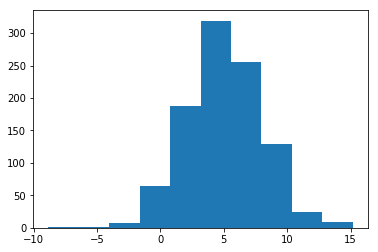

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
import seaborn as sns
%matplotlib inline

# Generate a PDF, with a mean of 5 and a standard deviation of 3
nd = stats.norm(5,3)
# Generate 1000 data from this distribution
data = nd.rvs(1000)
# Standard error
se = np.std(data, ddof=1)/np.sqrt(1000) 
print('The standard error is {0}'.format(se))
# Histogram
plt.hist(data)
plt.show()

In [8]:
# 95% confidence interval
print('95% Confidence interval: {0:4.2f} - {1:4.2f}'.format( nd.ppf(0.025), nd.ppf(0.975)))


95% Confidence interval: -0.88 - 10.88


In [10]:
# SD for hip implants
nd = stats.norm()
numSDs = nd.isf(0.0005)
tolerance = 1/numSDs
print('The required SD to fulfill both requirements = {0:6.4f} mm'.format(tolerance))

The required SD to fulfill both requirements = 0.3039 mm


# 6.3 ContinuousDistributions
- t-Distribution: Measuring the weight of your colleagues, you have obtained the following weights: 52, 70, 65, 85, 62, 83, 59 kg. Calculate the corresponding mean, and the 99 % confidence interval for the mean. Note: with n values you have n   1 DOF for the t-distribution. (Correct answer: 68:0 C =   17:2 kg.)
- Chi-square Distribution: Create three normally distributed data sets (mean D 0, SD D 1), with 1000 samples each. Then square them, sum them (so that you have 1000 data-points), and create a histogram with 100 bins. This should be similar to the curve for the chi-square distribution, with 3 DOF (i.e., it should come down at the left, see Fig. 6.22).
- F-Distribution: You have two apple trees. There are three apples from the first tree that weigh 110, 121, and 143 g, respectively, and four from the other which weigh 88, 93, 105, and 124 g, respectively. Are the variances from the two trees different?Note: calculate the corresponding F-value, and check if the CDF for the corresponding F-distribution is < 0:025. (Correct answer: no.)


In [14]:
'''Solution for Exercise "Continuous Distribution Functions"
'''
# author: Thomas Haslwanter, date: Oct-2015
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# T-distibution ---------------------------------------------------
# Enter the data
x = [52, 70, 65, 85, 62, 83, 59]
''' Note that "x" is a Python "list", not an array!
Arrays come with the numpy package, and have to contain all
elements of the same type.
Lists can mix different types, e.g. "x = [1, 'a', 2]" '''
# Generate the t-distribution: note that the degrees of freedom is the
# length of the data minus 1.
# In Python, the length of an object x is given by "len(x)" 
td = stats.t(len(x)-1)
alpha = 0.01
# From the t-distribution, you use the "PPF" function and multiply it with the standard error
tval = abs( td.ppf(alpha/2)*stats.sem(x) )
print('mean +/- 99%CI = {0:3.1f} +/- {1:3.1f}'.format(np.mean(x),tval))


mean +/- 99%CI = 68.0 +/- 17.2


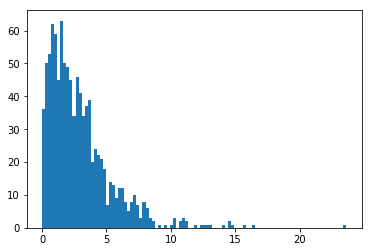

In [15]:
# Chi2-distribution, with 3 DOF ------------------------------------------------
# Define the normal distribution
   nd = stats.norm()
# Generate three sets of random variates from this distribution
   numData = 1000
   data1 = nd.rvs(numData)
   data2 = nd.rvs(numData)
   data3 = nd.rvs(numData)
# Show a histogram of the sum of the squares of these random data
   plt.hist(data1**2+data2**2 +data3**2, 100)
   plt.show()

In [17]:
# F-distribution --------------------------------------------------
apples1 = [110, 121, 143]
apples2 = [88, 93, 105, 124]
fval = np.std(apples1, ddof=1)/np.std(apples2, ddof=1)
fd = stats.distributions.f(len(apples1),len(apples2))
pval = fd.cdf(fval)
print('The p-value of the F-distribution = {0}.'.format(pval))
if pval>0.025 and pval<0.975:
    print('The variances are equal.')

The p-value of the F-distribution = 0.537640478466751.
The variances are equal.


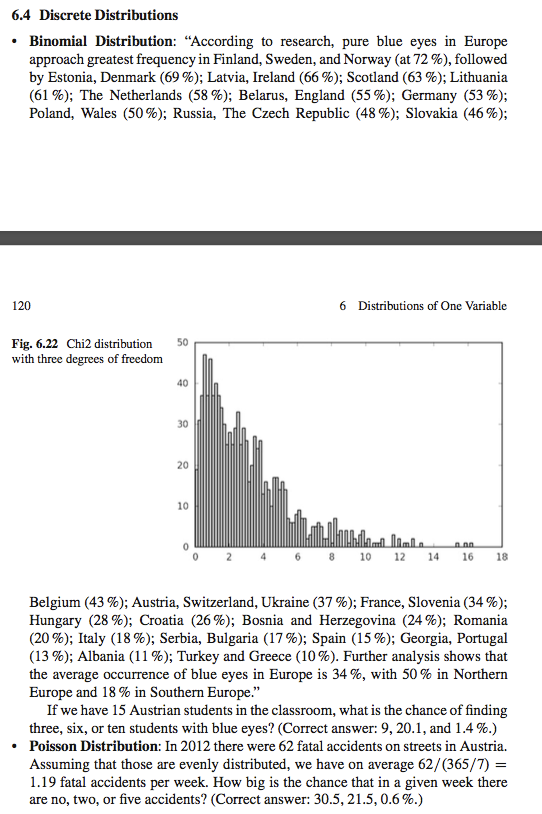

In [21]:
'''Solution for Exercise "Continuous Distribution Functions"'''
# author: Thomas Haslwanter, date: Sept-2015 from scipy import stats
# Binomial distribution --------------------------------------------------
# Generate the distribution
p = 0.37
n = 15
bd = stats.binom(n, p)
# Select the interesting numbers, and calculate the " Probability Mass Function" (PMF)
x = [3,6,10]
y = bd.pmf(x)
# To print the result, we use the "zip" function to generate pairs of numbers
for num, solution in zip(x,y):
    print('The chance of finding {0} students with blue eyes is {1:4.1f}%.'.format(num, solution*100))

The chance of finding 3 students with blue eyes is  9.0%.
The chance of finding 6 students with blue eyes is 20.1%.
The chance of finding 10 students with blue eyes is  1.4%.


In [24]:
# Poisson distribution --------------------------------------------------
# Generate the distribution.
# Watch out NOT to divide integers, as "3/4" gives "0" in Python 2.x!
prob = 62./(365./7)
pd = stats.poisson(prob)
# Select the interesting numbers, calculate the PMF, and print the results
x = [0,2,5]
y = pd.pmf(x)*100
for num, solution in zip(x,y):
    print('The chance of haveing {0} fatal accidents in one week is {1:4.1f}%.'.format(num,solution))
# The last line just makes sure that the program does not close, when it is run from the commandline.
input('Done! Thanks for using programs by thomas.')

The chance of haveing 0 fatal accidents in one week is 30.5%.
The chance of haveing 2 fatal accidents in one week is 21.5%.
The chance of haveing 5 fatal accidents in one week is  0.6%.
Done! Thanks for using programs by thomas.？


'？'